Load libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import json
import gc

Mount Google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 修改当前文件夹位置 假定notebook文件就在项目文件夹根目录
import os
def get_root_dir():
    if os.path.exists('/content/drive/MyDrive/'):
        return '/content/drive/MyDrive/AMEX Project/notebooks' #在Colab里
    else:
        return './' #在本地

#调用系统命令，相当于cd，但是直接!cd是不行的
os.chdir(get_root_dir())

Load data

In [ ]:
train_labels = pd.read_csv('../data/1-original-data/train_labels.csv')
print(train_labels.shape)
train_labels.head(2)

(458913, 2)


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0


In [5]:
train_df = pd.read_parquet('../data/1-original-data/train.parquet', engine = 'pyarrow')
print(train_df.shape)
train_df.head(2)

(5531451, 190)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0


In [6]:
train_ids = train_df['customer_ID'].unique().tolist()
print(len(train_ids))

458913


In [7]:
with open('../data/train_ids.json', 'w') as f:
    json.dump(train_ids, f)

In [ ]:
print(f"On average, there are {5531451/ 458913} records per customer in the training data")

On average, there are 12.053376130116165 records per customer in the training data


In [13]:
gc.collect()

157

In [14]:
test_df = pd.read_parquet('../data/1-original-data/test.parquet', engine = 'pyarrow')
print(test_df.shape)
test_df.head(2)

(11363762, 190)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0,0.010728,0.814497,0.0,0.168651,0.0,0.002347,...,-1,-1,-1,-1,0,NaN,NaN,-1,0.008281,-1
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0,0.011026,0.810848,0.0,0.241389,0.0,0.009132,...,-1,-1,-1,0,0,0.0,NaN,0,0.003753,0


In [15]:
test_ids = test_df['customer_ID'].unique().tolist()
print(len(test_ids))

924621


In [16]:
with open('../data/test_ids.json', 'w') as f:
    json.dump(test_ids, f)

In [ ]:
print(f"On average, there are {11363762/ 924621} records per customer in the testing data")

On average, there are 12.29018376177915 records per customer in the testing data


Check info of train_df

In [ ]:
train_df.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  5531451 non-null  object 
 1    S_2          5531451 non-null  object 
 2    P_2          5485466 non-null  float32
 3    D_39         5531451 non-null  int16  
 4    B_1          5531451 non-null  float32
 5    B_2          5529435 non-null  float32
 6    R_1          5531451 non-null  float32
 7    S_3          4510907 non-null  float32
 8    D_41         5529435 non-null  float32
 9    B_3          5529435 non-null  float32
 10   D_42         791314 non-null   float32
 11   D_43         3873055 non-null  float32
 12   D_44         5531451 non-null  int8   
 13   B_4          5531451 non-null  int16  
 14   D_45         5529434 non-null  float32
 15   B_5          5531451 non-null  float32
 16   R_2          5531451 non-null  int8   
 17   D_46         4319752 non-

In [ ]:
train_df['D_63'].value_counts()

3    4119621
0     930133
4     438390
1      25786
2      10556
5       6965
Name: D_63, dtype: int64

Top 10 columns with missing values

In [ ]:
tmp = train_df.isna().sum(axis=0).div(len(train_df)).mul(100).sort_values(ascending=False)

In [ ]:
print(tmp[:15])

D_88     99.891457
D_110    99.433530
B_39     99.391986
D_73     98.990211
B_42     98.707789
D_134    96.480146
B_29     93.104594
D_132    90.191055
D_76     88.746226
D_42     85.694278
D_142    82.926577
D_53     73.842921
D_50     56.809723
B_17     56.722874
D_105    54.622756
dtype: float64


Check time series behaviour of deliquency variables

In [ ]:
def plot_time_series(df, prefix='D', cols=None, display_ct=32):
    
    # DETERMINE WHICH COLUMNS TO PLOT
    if cols is not None and len(cols)==0: cols = None
    if cols is None:
        COLS = df.columns[2:-1]
        COLS = np.sort( [int(x[2:]) for x in COLS if x[0]==prefix] )
        COLS = [f'{prefix}_{x}' for x in COLS]
        print('#'*25)
        print(f'Plotting all {len(COLS)} columns with prefix {prefix}')
        print('#'*25)
    else:
        COLS = [f'{prefix}_{x}' for x in cols]
        print('#'*25)
        print(f'Plotting {len(COLS)} columns with prefix {prefix}')
        print('#'*25)

    # ITERATE COLUMNS
    for c in COLS:

        # CONVERT DATAFRAME INTO SERIES WITH COLUMN
        tmp = df[['customer_ID','S_2',c,'target']].copy()
        tmp2 = tmp.groupby(['customer_ID','target'])[['S_2',c]].agg(list).reset_index()
        tmp3 = tmp2.loc[tmp2.target==1]
        tmp4 = tmp2.loc[tmp2.target==0]

        # FORMAT PLOT
        spec = gridspec.GridSpec(ncols=2, nrows=1,
                             width_ratios=[3, 1], wspace=0.1,
                             hspace=0.5, height_ratios=[1])
        fig = plt.figure(figsize=(20,10))
        ax0 = fig.add_subplot(spec[0])

        # PLOT 32 DEFAULT CUSTOMERS AND 32 NON-DEFAULT CUSTOMERS
        t0 = []; t1 = []
        for k in range(display_ct):
            try:
                # PLOT DEFAULTING CUSTOMERS
                row = tmp3.iloc[k]
                ax0.plot(row.S_2,row[c],'-o',color='blue')
                t1 += row[c]
                # PLOT NON-DEFAULT CUSTOMERS
                row = tmp4.iloc[k]
                ax0.plot(row.S_2,row[c],'-o',color='orange')
                t0 += row[c]
            except:
                pass
        plt.title(f'Feature {c} (Key: BLUE=DEFAULT, orange=no default)',size=18)

        # PLOT HISTOGRAMS
        ax1 = fig.add_subplot(spec[1])
        try:
            # COMPUTE BINS
            t = t0+t1; mn = np.nanmin(t); mx = np.nanmax(t)
            if mx==mn:
                mx += 0.01; mn -= 0.01
            bins = np.arange(mn,mx+(mx-mn)/20,(mx-mn)/20 )
            # PLOT HISTOGRAMS
            if np.sum(np.isnan(t1))!=len(t1):
                ax1.hist(t1,bins=bins,orientation="horizontal",alpha = 0.8,color='blue')
            if np.sum(np.isnan(t0))!=len(t0):
                ax1.hist(t0,bins=bins,orientation="horizontal",alpha = 0.8,color='orange')
        except:
            pass
        plt.show()

In [ ]:
# get name of all delinquency variables
d_vars = []
plotted = set([39,41,47,45,46,48,54,59,61,62,75,96,105,112,124])
to_remove = set([87, 88, 110, 73, 134, 132, 76, 42, 142, 116, 63, 126, 66])
for col in train_df.columns:
  if str(col).startswith('D'):
    num = int(col[2:])
    if num not in plotted and num not in to_remove:
      d_vars.append(num)

In [ ]:
print(len(d_vars))
d_vars

68


[43,
 44,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 60,
 64,
 65,
 68,
 69,
 70,
 71,
 72,
 74,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 89,
 91,
 92,
 93,
 94,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 111,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 130,
 131,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145]

In [ ]:
d_vars[40:] 

[111,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 130,
 131,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145]

In [ ]:
# append target column to train_df
train_df = train_df.merge(train_labels, on='customer_ID', how='left')
print(train_df.shape)

(5531451, 191)


#########################
Plotting 10 columns with prefix D
#########################


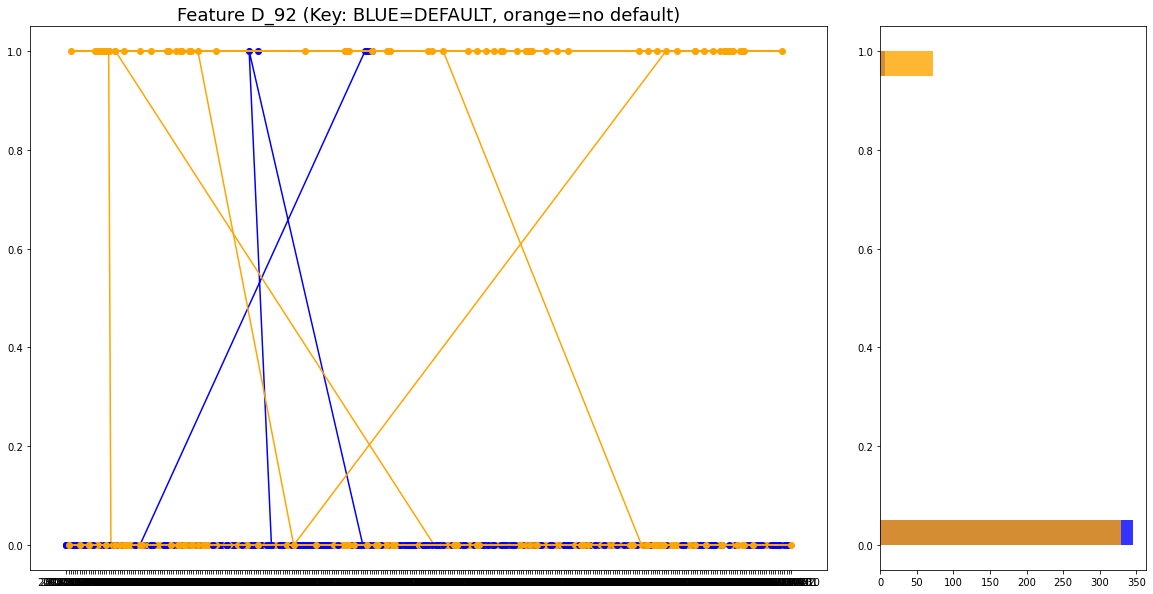

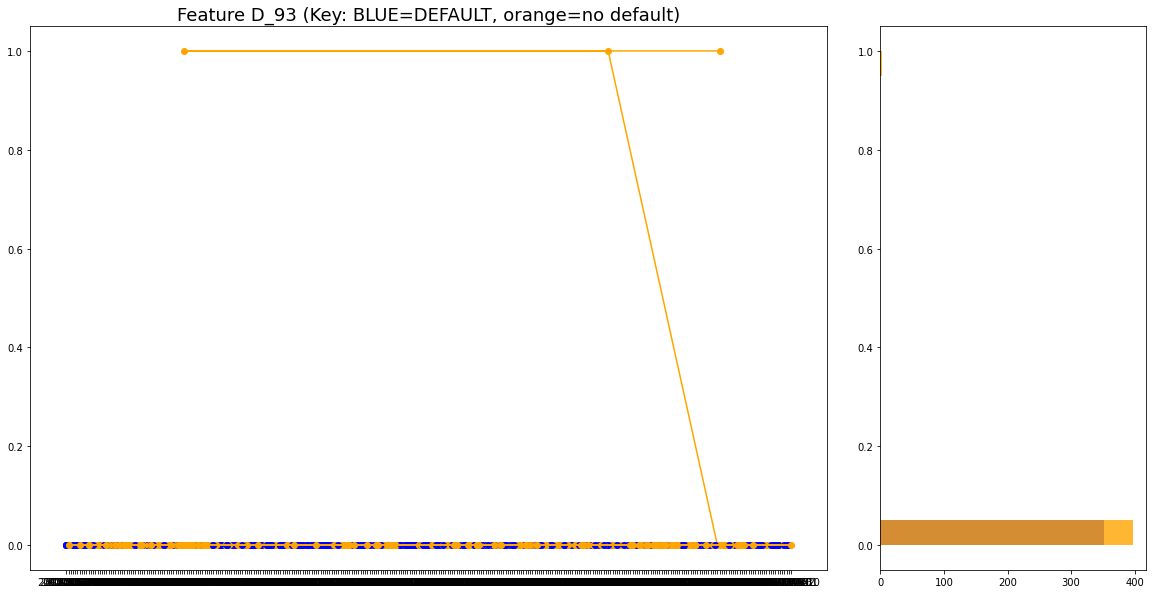

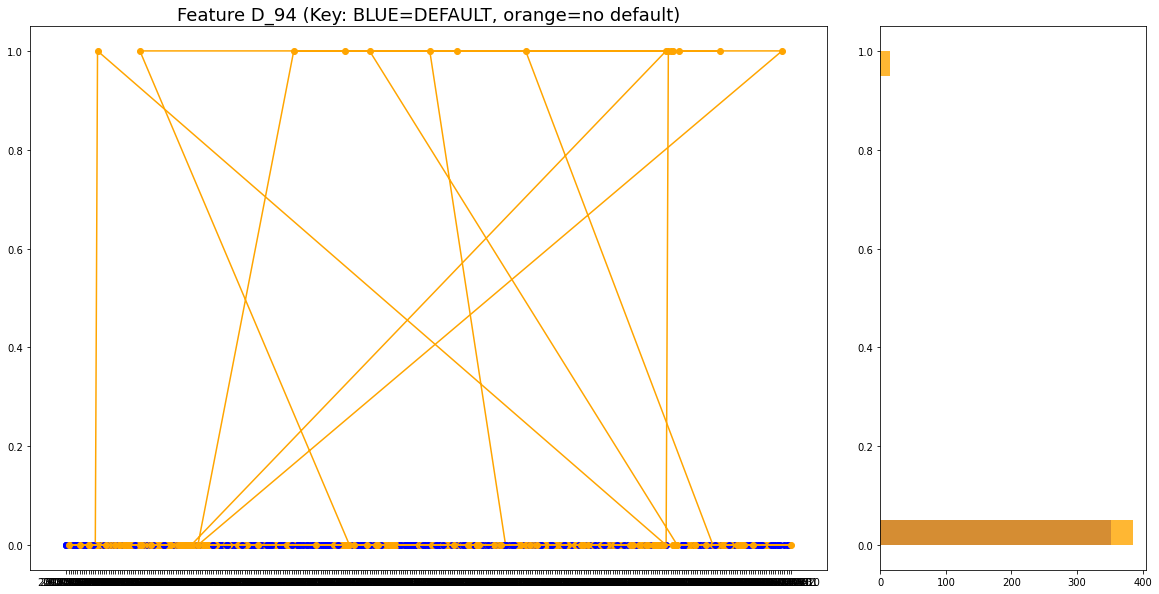

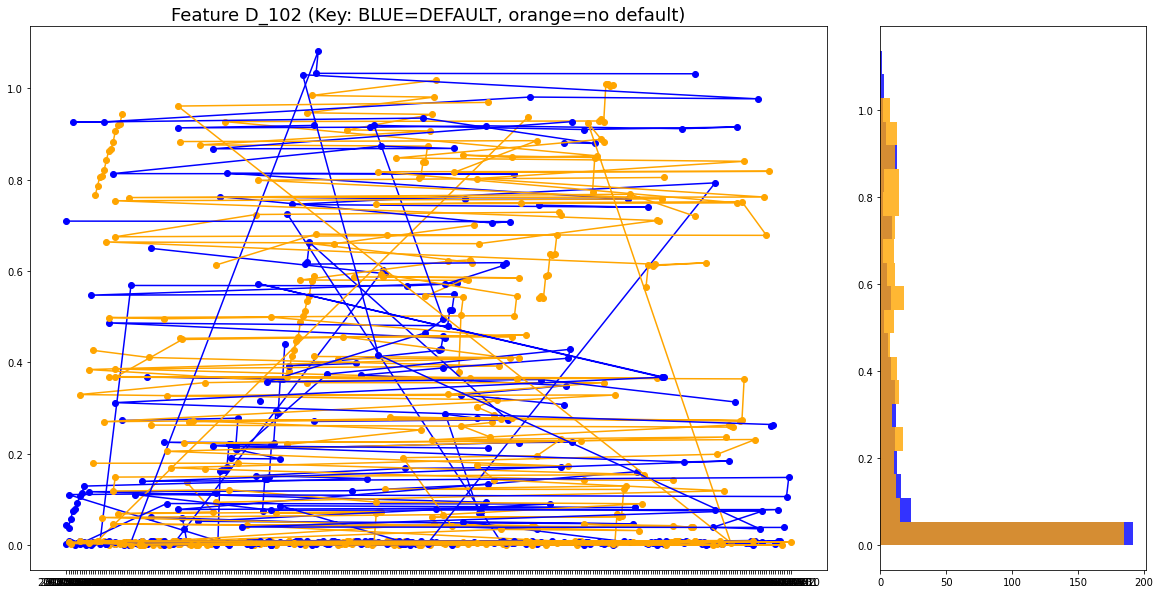

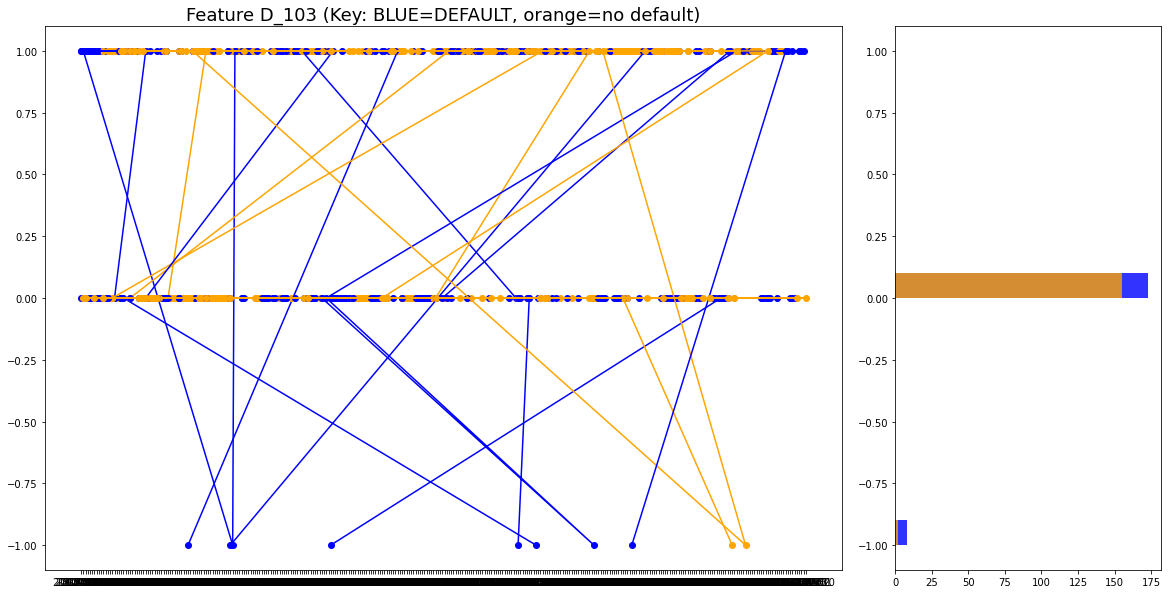

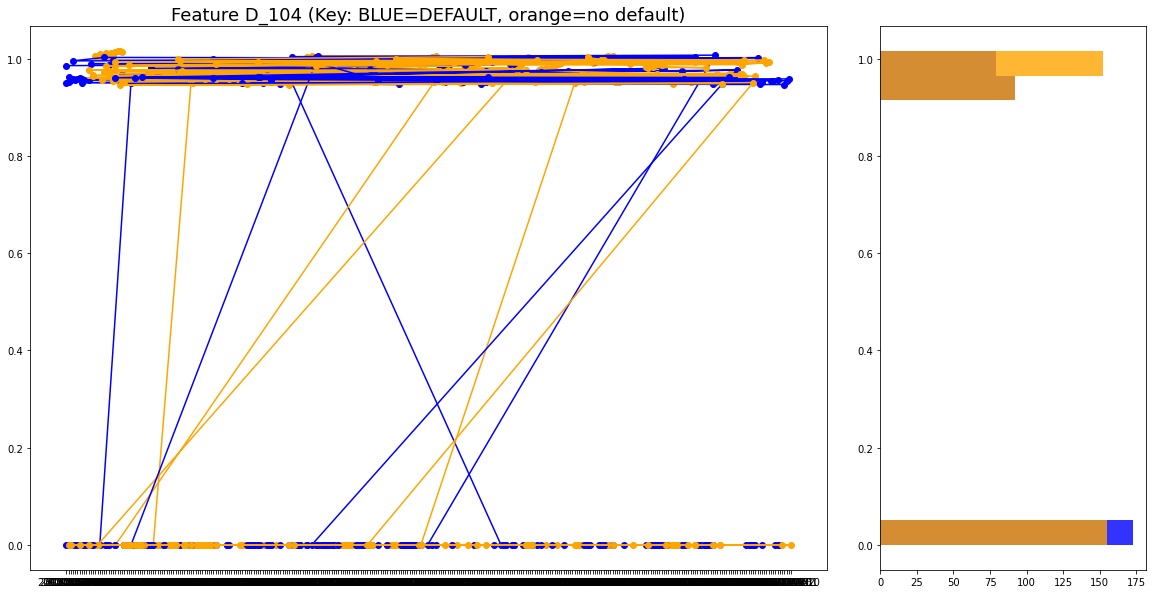

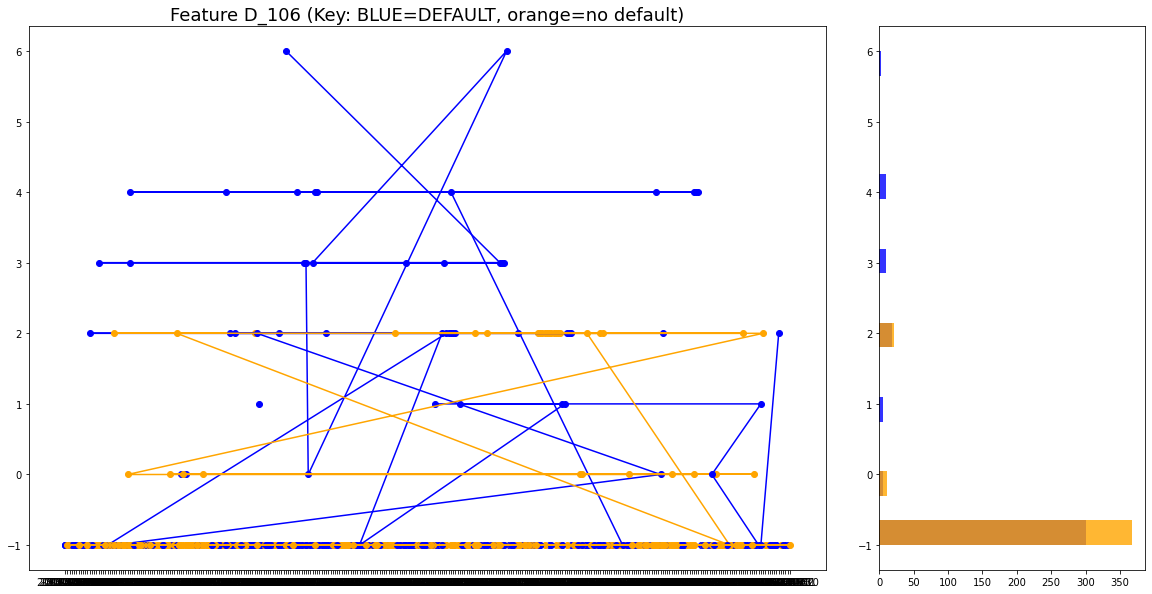

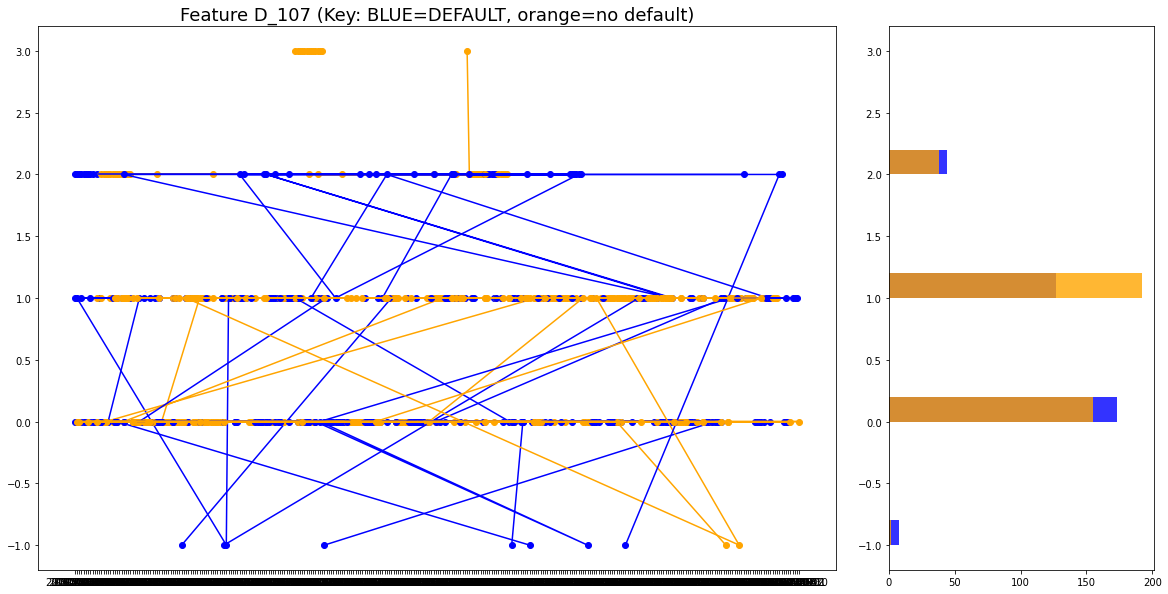

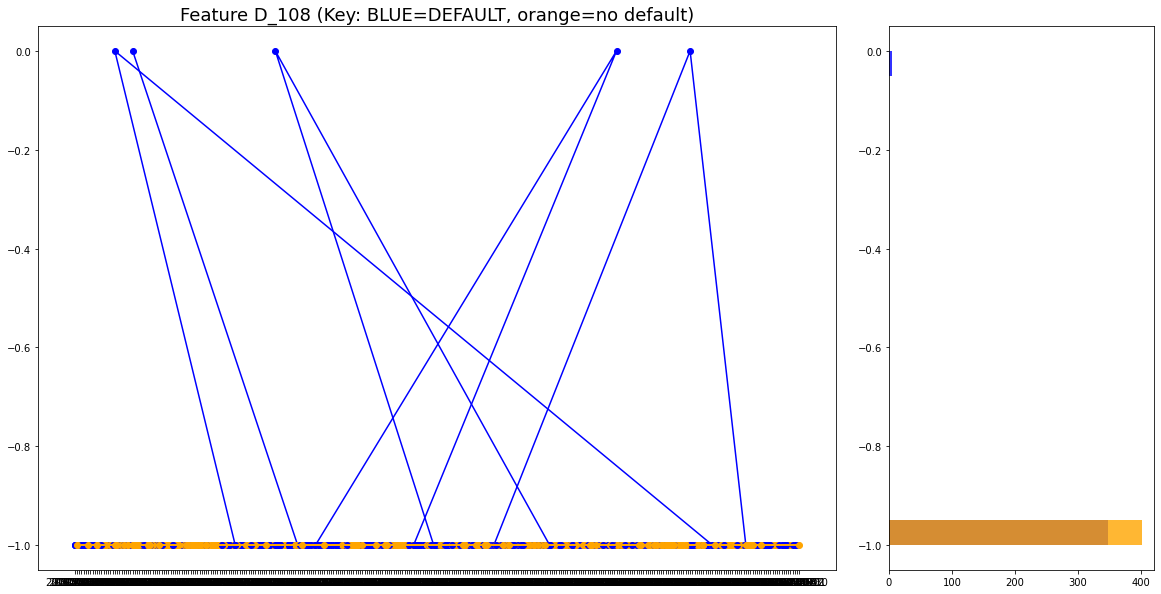

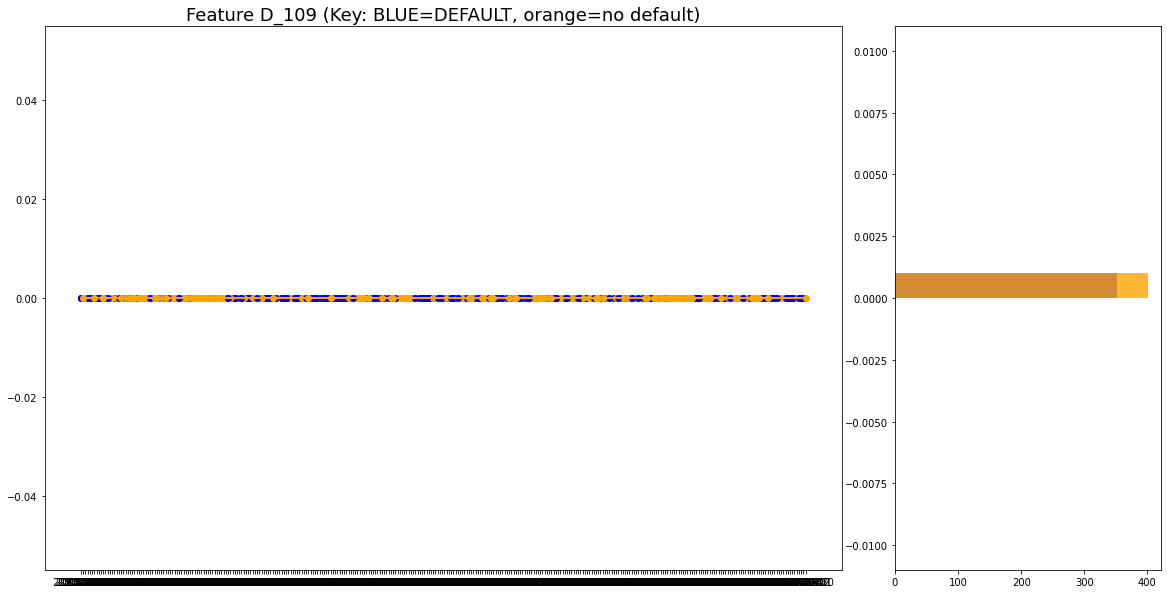

In [ ]:
plot_time_series(train_df, 'D', d_vars[30:40])

#########################
Plotting 1 columns with prefix D
#########################


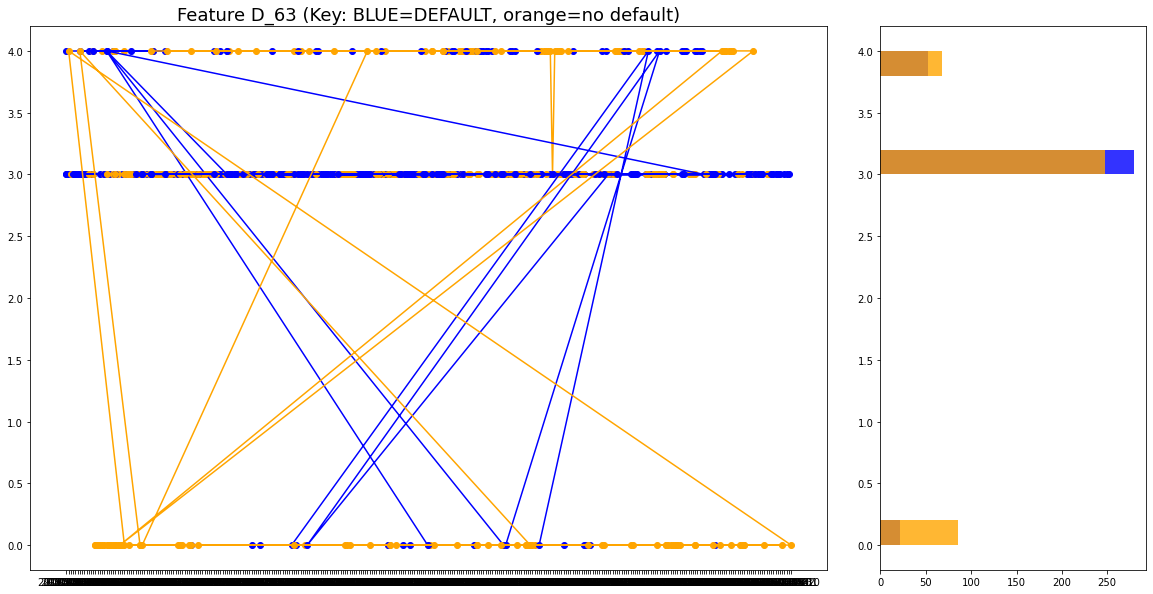

In [ ]:
plot_time_series(train_df, 'D', [63])